Diagnosis for 20211022 experiment, fitting version 6.

In [2]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

from util import *

Populating the interactive namespace from numpy and matplotlib


## Get residual vectors

In [3]:
T_celsius=[20,22.5,25,27.5,30,32.5,35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]

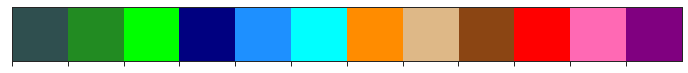

In [11]:
# Create custom palette
palette=['#2f4f4f','#228b22','#00ff00','#000080','#1e90ff','#00ffff','#ff8c00','#deb887','#8b4513','#ff0000','#ff69b4','#800080',]
sns.palplot(palette)

In [12]:
def get_expected_fit(row):
    function = lambda dH, Tm, x: 1 / (1 + np.exp(dH/0.00198*(Tm**-1 - x)))
#     conds = [x for x in lib2.keys() if x.endswith('_redNorm_median')]
#     vals = np.array(row[conds].values,dtype=float) 
#     errors = np.array(row[errs].values,dtype=float)

    T_celsius=[20,22.5,25,27.5,30,32.5,35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]
    T_kelvin=[x+273.15 for x in T_celsius]
    T_inv = np.array([1/x for x in T_kelvin])
    pred_fit = function(row['dH'],row['Tm'], T_inv)
    
    return pred_fit

In [71]:
lib2 = read_fitted_variant(r'/Users/yuxi/workspace/nnn/data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz').reset_index()
# lib2 = lib2.query('RMSE < 1')
conds = [x for x in lib2.keys() if x.endswith('_norm')]
errs = [x for x in lib2.keys() if x.endswith('_norm_std')]

86.42% variants passed the filter n_clusters > 5 & dG_37_se < 0.2 & Tm_se < 2.5 & dH_se < 2.5


In [72]:
lib2.shape

(27981, 72)

In [74]:
def get_residuals(row, conds):
    residuals = row[conds].values - get_expected_fit(row)
    return residuals

residual_conds = ['residual_{}C'.format(t) for t in T_celsius]
lib2[residual_conds] = lib2.apply(lambda row: get_residuals(row, conds), axis=1,result_type='expand')

In [75]:
lib2.head()

,SEQID,Green14_20_norm,Green14_20_norm_std,Green15_22.5_norm,Green15_22.5_norm_std,Green16_25_norm,Green16_25_norm_std,Green17_27.5_norm,Green17_27.5_norm_std,Green18_30_norm,...,residual_37.5C,residual_40C,residual_42.5C,residual_45C,residual_47.5C,residual_50C,residual_52.5C,residual_55C,residual_57.5C,residual_60C
0,BC0,-0.138808,0.126940,-0.130819,0.144318,-0.108997,0.217057,-0.132276,0.163500,-0.153835,...,-0.131835,-0.095399,-0.085411,-0.098818,-0.070447,-0.029023,-0.081573,-0.059713,-0.039504,-0.072696
1,BC1,-0.088177,0.153139,-0.026094,0.181530,-0.054233,0.214253,-0.036633,0.186208,-0.061795,...,-0.117077,-0.175243,-0.207183,-0.330122,-0.301103,-0.354095,-0.367916,-0.403415,-0.344028,-0.466777
2,BC2,-0.011455,0.232782,0.000825,0.180591,0.021877,0.364618,0.064680,0.230905,0.083584,...,-0.171787,-0.173454,-0.218204,-0.204759,-0.252987,-0.251246,-0.343203,-0.256751,-0.260397,-0.189569
3,BC3,-0.048672,0.252318,-0.030815,0.176781,-0.046238,0.347769,-0.040474,0.307029,-0.049103,...,-0.071923,-0.046067,-0.052676,-0.086710,-0.052143,-0.035233,-0.071358,-0.016071,-0.009826,0.018953
4,BC4,-0.037135,0.192135,-0.025559,0.180159,0.007286,0.258787,0.008959,0.215012,-0.039662,...,-0.063403,-0.039520,-0.088422,-0.133748,-0.152975,-0.167873,-0.232357,-0.180611,-0.230057,-0.204532


In [76]:
print('min residual:\n'), lib2[residual_conds].agg('min'), print('\nmax residual:\n'), lib2[residual_conds].agg('max')

min residual:


max residual:



(None,
 residual_20C     -0.251049
 residual_22.5C   -0.253711
 residual_25C     -0.222996
 residual_27.5C   -0.200030
 residual_30C     -0.245282
 residual_32.5C   -0.271010
 residual_35C     -0.342796
 residual_37.5C   -0.370950
 residual_40C     -0.420855
 residual_42.5C   -0.462072
 residual_45C     -0.539231
 residual_47.5C   -0.583277
 residual_50C     -0.642961
 residual_52.5C   -0.650850
 residual_55C     -0.693288
 residual_57.5C   -0.681432
 residual_60C     -0.783101
 dtype: float64,
 None,
 residual_20C      0.754699
 residual_22.5C    0.466086
 residual_25C      0.384594
 residual_27.5C    0.347176
 residual_30C      0.537573
 residual_32.5C    0.318196
 residual_35C      0.565549
 residual_37.5C    0.461141
 residual_40C      0.239728
 residual_42.5C    0.357376
 residual_45C      0.372588
 residual_47.5C    0.429327
 residual_50C      0.441069
 residual_52.5C    0.450937
 residual_55C      0.445291
 residual_57.5C    0.547559
 residual_60C      0.546456
 dtype: float64)

## UMAP visualization

In [77]:
import umap

import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'

hover_data=['SEQID', 'n_clusters','dH', 'Tm', 'RMSE']

In [78]:
%%time
np.random.seed(42)
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='euclidean').fit_transform(lib2[residual_conds])
lib2[['UMAP_1', 'UMAP_2']] = embedding

CPU times: user 26.9 s, sys: 1.68 s, total: 28.6 s
Wall time: 6.1 s


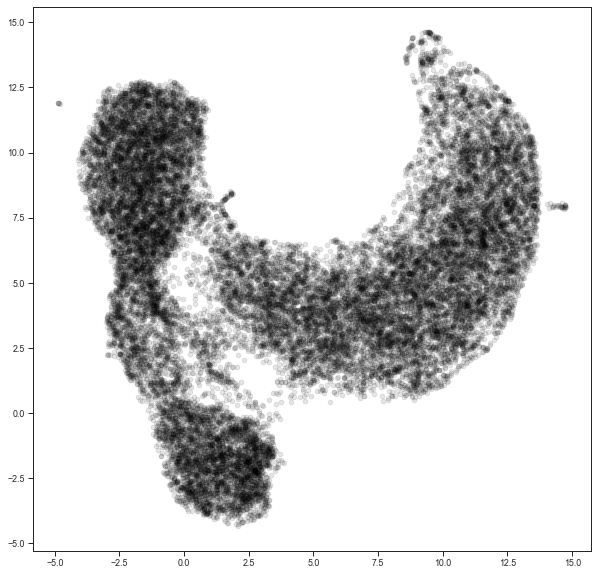

In [79]:
fig, ax = subplots(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], color='k', alpha=0.1)

In [54]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='series', 
                 hover_data=hover_data,
                 width=1100, height=1000)
fig.write_html("../fig/residual_UMAP_series.html")
fig.write_image("../fig/residual_UMAP_series.png")
fig.show()

ValueError: Value of 'hover_data_0' is not the name of a column in 'data_frame'. Expected one of ['Green14_20_norm', 'Green14_20_norm_std', 'Green15_22.5_norm', 'Green15_22.5_norm_std', 'Green16_25_norm', 'Green16_25_norm_std', 'Green17_27.5_norm', 'Green17_27.5_norm_std', 'Green18_30_norm', 'Green18_30_norm_std', 'Green19_32.5_norm', 'Green19_32.5_norm_std', 'Green20_35_norm', 'Green20_35_norm_std', 'Green21_37.5_norm', 'Green21_37.5_norm_std', 'Green22_40_norm', 'Green22_40_norm_std', 'Green23_42.5_norm', 'Green23_42.5_norm_std', 'Green24_45_norm', 'Green24_45_norm_std', 'Green25_47.5_norm', 'Green25_47.5_norm_std', 'Green26_50_norm', 'Green26_50_norm_std', 'Green27_52.5_norm', 'Green27_52.5_norm_std', 'Green28_55_norm', 'Green28_55_norm_std', 'Green29_57.5_norm', 'Green29_57.5_norm_std', 'Green30_60_norm', 'Green30_60_norm_std', 'RMSE', 'Tm', 'Tm_lb', 'Tm_std', 'Tm_ub', 'chisq', 'dG_37', 'dG_37_lb', 'dG_37_std', 'dG_37_ub', 'dH', 'dH_lb', 'dH_std', 'dH_ub', 'dS', 'dS_lb', 'dS_std', 'dS_ub', 'dof', 'enforce_fmax', 'enforce_fmin', 'fmax', 'fmax_lb', 'fmax_std', 'fmax_ub', 'fmin', 'fmin_lb', 'fmin_std', 'fmin_ub', 'n_clusters', 'rsqr', 'Tm_se', 'dG_37_se', 'dH_se', 'dS_se', 'fmax_se', 'fmin_se', 'residual_20C', 'residual_22.5C', 'residual_25C', 'residual_27.5C', 'residual_30C', 'residual_32.5C', 'residual_35C', 'residual_37.5C', 'residual_40C', 'residual_42.5C', 'residual_45C', 'residual_47.5C', 'residual_50C', 'residual_52.5C', 'residual_55C', 'residual_57.5C', 'residual_60C', 'UMAP_1', 'UMAP_2'] but received: SEQID

In [ ]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='Tm', size='RMSE',
                 hover_data=['RefSeq', 'n_clusters_signal', 'dH', 'dS', 'Tm', 'RMSE'],
                 width=1200, height=1000, range_color=[273,373],
                 title='UMAP of residuals across temperatures')

fig.write_html("../fig/residual_UMAP_RMSEsize_Tmcolor.html")
fig.write_html("../fig/residual_UMAP_RMSEsize_Tmcolor.png")
fig.show()

In [ ]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='Tm',
                 hover_data=['RefSeq', 'n_clusters_signal', 'dH', 'dS', 'Tm', 'RMSE'],
                 width=1100, height=1000, range_color=[273,373],
                 title='UMAP of fitting residuals across temperatures')

fig.write_html("../fig/residual_UMAP_Tm-color.html")
fig.write_image('../fig/residual_UMAP_Tm-color.png')
fig.show()

In [ ]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='RMSE',
                 hover_data=['RefSeq', 'n_clusters_signal', 'dH', 'dS', 'Tm', 'RMSE'],
                 width=1000, height=1000, range_color=[0,0.15],
                 title='UMAP of fitting residuals across temperatures')

fig.write_html("../fig/residual_UMAP_RMSE-color.html")
fig.write_image("../fig/residual_UMAP_RMSE-color.png")
fig.show()

In [ ]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='dG_37C',
                 hover_data=hover_data,
                 width=1100, height=1000, range_color=[-10, 10],
                 title='UMAP of fitting residuals across temperatures')

fig.write_html("../fig/residual_UMAP_dG_37C-color.html")
# fig.write_image("../fig/residual_UMAP_dG_37C-color.png")
fig.show()

## Louvain clustering

In [80]:
from sklearn import cluster

from sklearn.neighbors import kneighbors_graph
from community import best_partition
import networkx as nx

In [81]:
%%time
A = kneighbors_graph(lib2[residual_conds].values, n_neighbors=7, p=1)
G = nx.from_scipy_sparse_matrix(A)

CPU times: user 13.8 s, sys: 3.32 s, total: 17.1 s
Wall time: 17.7 s


In [82]:
%%time
partition = best_partition(G, resolution=1)

CPU times: user 40.2 s, sys: 95.8 ms, total: 40.3 s
Wall time: 40.3 s


In [83]:
n_cluster = len(np.unique(list(partition.values())))
n_cluster

10

In [84]:
cluster_lbl = ['%02d' % lbl for lbl in list(partition.values())]
lbl_color_map = {'%02d' % i: palette[i] for i in range(n_cluster)}
lib2['cluster'] = cluster_lbl

In [61]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='cluster', #size='RMSE',
                 hover_data=hover_data,
                 width=1000, height=1000, #range_color=[273,373],
                 color_discrete_map=lbl_color_map,
                 title='Louvain clusters of fitting residuals across temperatures')

fig.write_html("./fig/residual_UMAP_clusters_resolution1.html")
# fig.write_image('./fig/residual_UMAP_clusters.png')
fig.show()

ValueError: Value of 'hover_data_0' is not the name of a column in 'data_frame'. Expected one of ['Green14_20_norm', 'Green14_20_norm_std', 'Green15_22.5_norm', 'Green15_22.5_norm_std', 'Green16_25_norm', 'Green16_25_norm_std', 'Green17_27.5_norm', 'Green17_27.5_norm_std', 'Green18_30_norm', 'Green18_30_norm_std', 'Green19_32.5_norm', 'Green19_32.5_norm_std', 'Green20_35_norm', 'Green20_35_norm_std', 'Green21_37.5_norm', 'Green21_37.5_norm_std', 'Green22_40_norm', 'Green22_40_norm_std', 'Green23_42.5_norm', 'Green23_42.5_norm_std', 'Green24_45_norm', 'Green24_45_norm_std', 'Green25_47.5_norm', 'Green25_47.5_norm_std', 'Green26_50_norm', 'Green26_50_norm_std', 'Green27_52.5_norm', 'Green27_52.5_norm_std', 'Green28_55_norm', 'Green28_55_norm_std', 'Green29_57.5_norm', 'Green29_57.5_norm_std', 'Green30_60_norm', 'Green30_60_norm_std', 'RMSE', 'Tm', 'Tm_lb', 'Tm_std', 'Tm_ub', 'chisq', 'dG_37', 'dG_37_lb', 'dG_37_std', 'dG_37_ub', 'dH', 'dH_lb', 'dH_std', 'dH_ub', 'dS', 'dS_lb', 'dS_std', 'dS_ub', 'dof', 'enforce_fmax', 'enforce_fmin', 'fmax', 'fmax_lb', 'fmax_std', 'fmax_ub', 'fmin', 'fmin_lb', 'fmin_std', 'fmin_ub', 'n_clusters', 'rsqr', 'Tm_se', 'dG_37_se', 'dH_se', 'dS_se', 'fmax_se', 'fmin_se', 'residual_20C', 'residual_22.5C', 'residual_25C', 'residual_27.5C', 'residual_30C', 'residual_32.5C', 'residual_35C', 'residual_37.5C', 'residual_40C', 'residual_42.5C', 'residual_45C', 'residual_47.5C', 'residual_50C', 'residual_52.5C', 'residual_55C', 'residual_57.5C', 'residual_60C', 'UMAP_1', 'UMAP_2', 'cluster'] but received: SEQID

In [90]:
lbls = list(lib2.groupby('cluster').aggregate('mean')[residual_conds].index)

In [63]:
lib2.groupby('cluster').aggregate('mean')[residual_conds]

,residual_20C,residual_22.5C,residual_25C,residual_27.5C,residual_30C,residual_32.5C,residual_35C,residual_37.5C,residual_40C,residual_42.5C,residual_45C,residual_47.5C,residual_50C,residual_52.5C,residual_55C,residual_57.5C,residual_60C
cluster,,,,,,,,,,,,,,,,,
00,-0.079110,-0.053410,-0.056799,-0.067446,-0.098513,-0.047891,-0.070629,-0.084752,-0.070106,-0.078745,-0.081523,-0.054527,-0.029002,-0.052227,-0.020367,0.003288,-0.016695
01,0.040643,0.041399,0.053289,0.051181,0.039577,0.072832,0.051988,0.085186,0.130732,0.201632,0.188226,0.227518,0.245797,0.230210,0.235572,0.256812,0.285950
02,-0.052677,-0.026594,-0.025902,-0.035022,-0.065222,-0.022629,-0.055927,-0.082875,-0.093177,-0.106073,-0.157371,-0.160789,-0.174146,-0.210437,-0.215783,-0.213176,-0.233695
03,-0.055720,-0.025189,-0.002435,0.026575,0.041687,0.066907,0.066016,0.049334,0.065866,0.108312,0.052714,0.058781,0.049333,0.034266,0.023582,0.032857,0.039301
04,-0.000190,0.022097,0.025677,0.015704,-0.015290,0.011789,-0.025015,-0.046245,-0.048546,-0.030690,-0.078976,-0.073068,-0.078138,-0.095881,-0.100441,-0.089625,-0.090868
05,0.004526,0.030882,0.038288,0.028703,-0.001185,0.029467,-0.015269,-0.048602,-0.067333,-0.076382,-0.133349,-0.137385,-0.148512,-0.180357,-0.190880,-0.187680,-0.210026
06,-0.031662,-0.017904,-0.014078,-0.019836,-0.039026,-0.007247,-0.030324,-0.027634,-0.008728,0.028497,0.002053,0.027973,0.036286,0.022434,0.031174,0.046819,0.049983
07,-0.062605,-0.036182,-0.037109,-0.047462,-0.079056,-0.037841,-0.072934,-0.105766,-0.123717,-0.157630,-0.220813,-0.244211,-0.271552,-0.319297,-0.328004,-0.337072,-0.377064
08,-0.072075,-0.057385,-0.059896,-0.071919,-0.101605,-0.055860,-0.077980,-0.087986,-0.076181,-0.070002,-0.098419,-0.089501,-0.096178,-0.137155,-0.135799,-0.126977,-0.141715


### Visualization

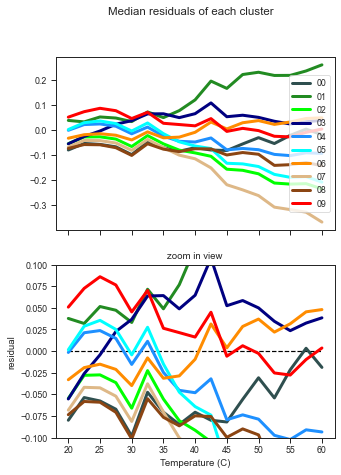

In [91]:
fi, ax = plt.subplots(2, 1, sharex=True, figsize=(5,7))
plt.suptitle('Median residuals of each cluster')
ax[1].plot([T_celsius[0], T_celsius[-1]], [0, 0], 'k--')
for i in range(n_cluster):
    ax[0].plot(T_celsius, lib2.groupby('cluster').aggregate('median').loc['%02d'%i, residual_conds].values, color=lbl_color_map['%02d'%i], lw=3)
    ax[1].plot(T_celsius, lib2.groupby('cluster').aggregate('median').loc['%02d'%i, residual_conds].values, color=lbl_color_map['%02d'%i], lw=3)
plt.ylim([-0.1, 0.1])
ax[0].legend(['%02d'%i for i in range(n_cluster)], loc='right')
ax[1].set_title('zoom in view')
plt.xlabel('Temperature (C)')
plt.ylabel('residual')

plt.savefig('./fig/median_residuals_of_each_cluster.png')

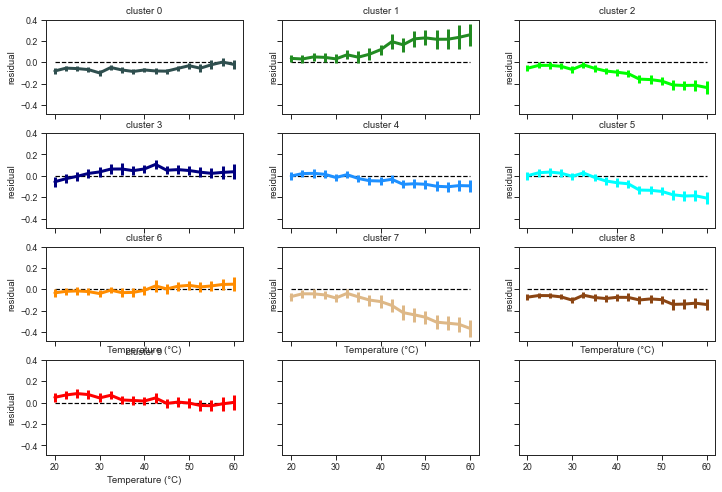

In [93]:
fig, ax = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(12,8))
ax = ax.flatten()
for i in range(n_cluster):
    ax[i].plot([T_celsius[0], T_celsius[-1]], [0, 0], 'k--')
    errors = lib2.groupby('cluster').aggregate('std').loc['%02d'%i, residual_conds].values
    ax[i].errorbar(T_celsius, lib2.groupby('cluster').aggregate('median').loc['%02d'%i, residual_conds].values, yerr=errors,fmt='-', color=lbl_color_map['%02d'%i], lw=3)
#     plt.ylim([-0.1, 0.1])
    if i > 5:
        ax[i].set_xlabel('Temperature (°C)')
    ax[i].set_ylabel('residual')
    ax[i].set_title('cluster %d' % i)
    
# ax[-1].legend([str(i) for i in range(n_cluster)], loc='right')

plt.savefig('./fig/median_residuals_of_each_cluster_v6.png')

In [94]:
agg_col = ['n_clusters', 'dH', 'Tm', 'RMSE']
cluster_median = lib2.groupby('cluster').aggregate('median')[agg_col]
cluster_median

,n_clusters,dH,Tm,RMSE
cluster,,,,
00,105.0,-29.774499,334.006840,0.119099
01,98.0,-14.050527,315.106369,0.157983
02,97.0,-50.310367,316.888542,0.103817
03,95.0,-14.472375,298.640062,0.203078
04,96.0,-42.126469,311.656084,0.116621
05,98.0,-46.966057,315.210607,0.108890
06,97.0,-13.719593,310.866403,0.154051
07,102.0,-52.857115,318.027609,0.100511
08,97.0,-43.631336,320.985389,0.105344


In [95]:
lib2['Tm_Celsius'] = lib2['Tm'] - 273.15

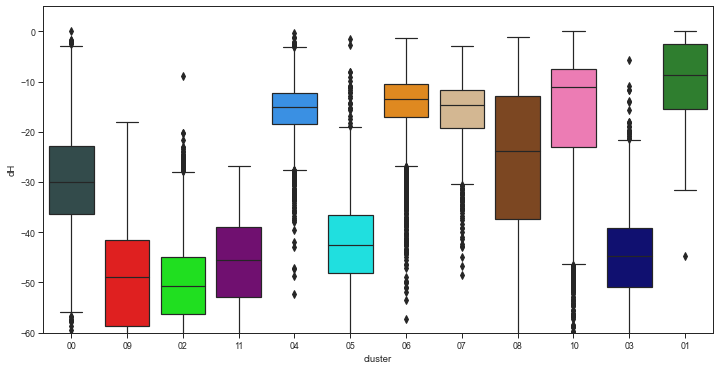

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=lib2, x='cluster', y='dH', palette=lbl_color_map)
plt.ylim([-60, 5])
plt.show()

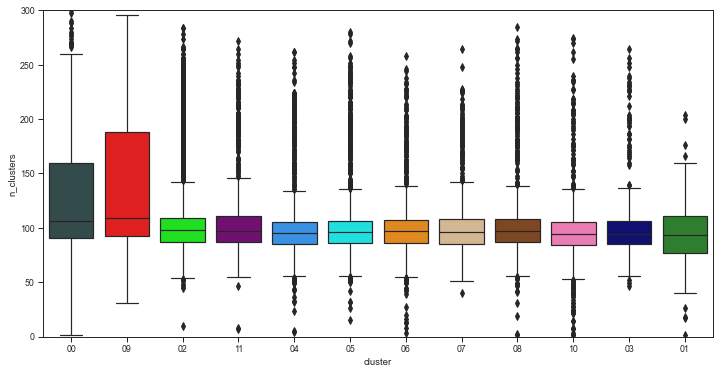

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=lib2, x='cluster', y='n_clusters', palette=lbl_color_map)
plt.ylim([0, 300])
plt.savefig('./fig/n_cluster_signal_per_cluster.png')

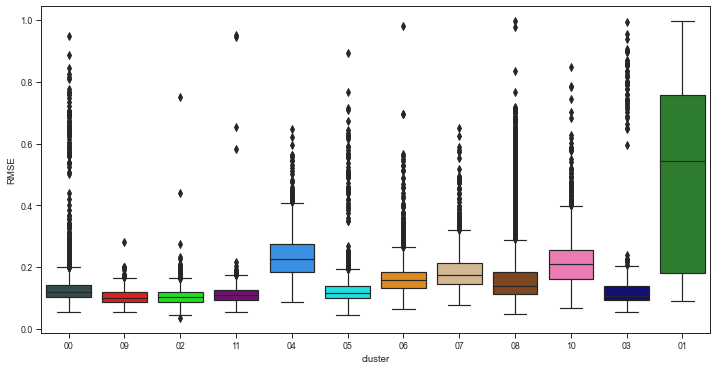

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=lib2, x='cluster', y='RMSE', palette=lbl_color_map)
# plt.ylim([0, 300])
plt.savefig('./fig/RMSE_per_cluster.png')

In [36]:
np.sum(lib2[lib2['cluster'] == '01']['n_clusters'] == 1)

1

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='n_clusters'>

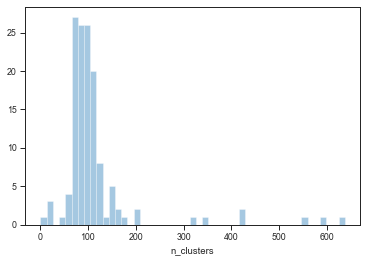

In [37]:
sns.distplot(lib2[lib2['cluster'] == '01']['n_clusters'], kde=False, rug=False)

ValueError: Could not interpret input 'Series'

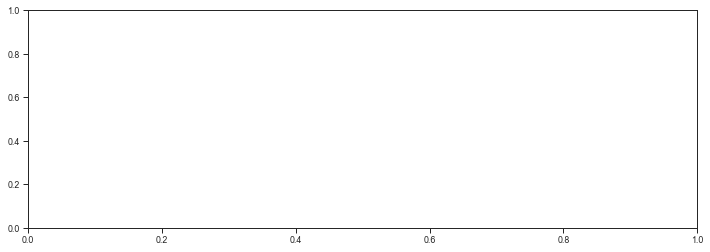

In [89]:
fig, ax = subplots(figsize=(12,4))
sns.countplot(data=lib2[lib2['cluster'] == '04'], x='Series')

plt.savefig("../fig/cluster4_series_countplot.png")


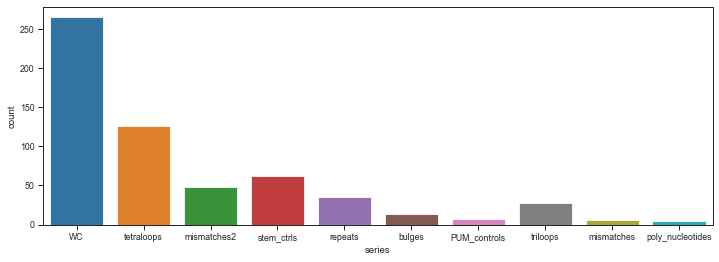

In [80]:
fig, ax = subplots(figsize=(12,4))
sns.countplot(data=lib2[lib2['cluster'] == '7'], x='series')

plt.savefig("../fig/cluster7_series_countplot.png", dpi=800)


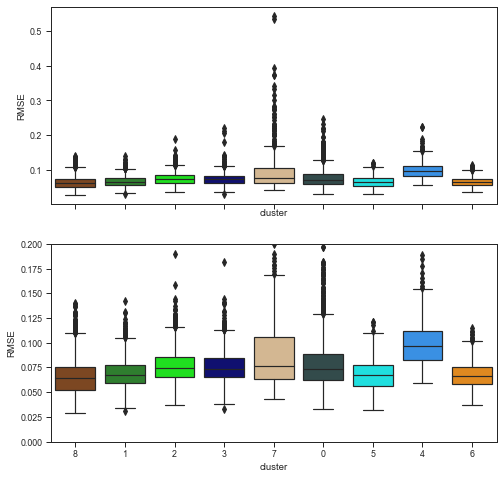

In [27]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,8))
sns.boxplot(data=lib2, x='cluster', y='RMSE', palette=lbl_color_map, ax=ax[0])
sns.boxplot(data=lib2, x='cluster', y='RMSE', palette=lbl_color_map, ax=ax[1])
plt.ylim([0, 0.2])
plt.savefig('../fig/RMSE_per_cluster.png', dpi=600)

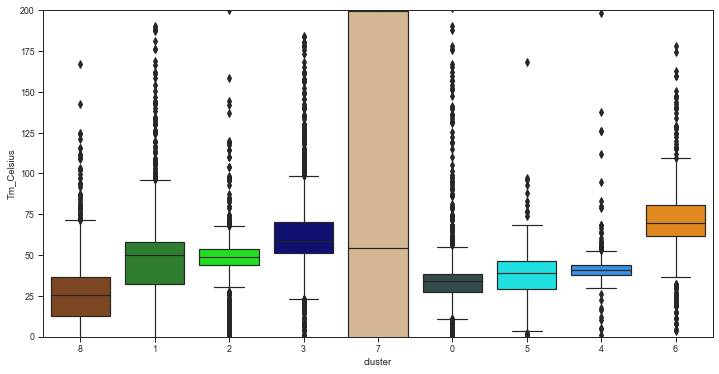

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(data=lib2, x='cluster', y='Tm_Celsius', palette=lbl_color_map, ax=ax)
# sns.boxplot(data=lib2, x='cluster', y='Tm_Celsius', palette=lbl_color_map, ax=ax[1])
plt.ylim([0, 200])
plt.show()

#### Size of the clusters

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



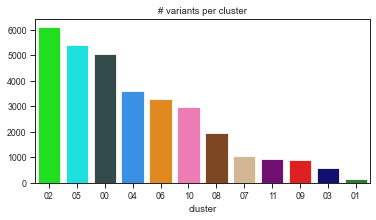

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6,3))
size_counts = lib2.value_counts('cluster')
sns.barplot(size_counts.index, size_counts, palette=lbl_color_map, ax=ax)
# sns.boxplot(data=lib2, x='cluster', y='Tm_Celsius', palette=lbl_color_map, ax=ax[1])
# plt.ylim([0, 200])
plt.title('# variants per cluster')

plt.savefig('./fig/size_of_clusters.png', dpi=600)
plt.show()

ValueError: Could not interpret value `dH` for parameter `x`

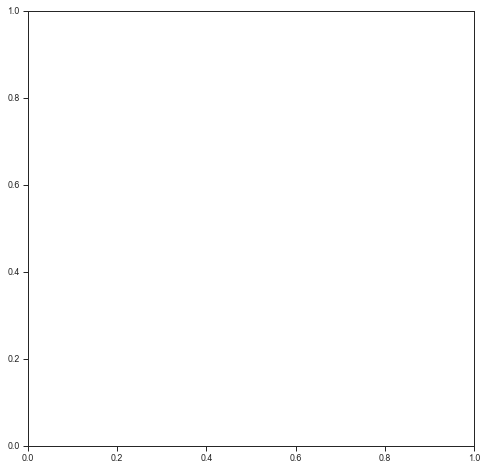

In [32]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=cluster_median, x='dH', y='dS', hue='cluster', s=400, palette=lbl_color_map)
for i in range(n_cluster):
    plt.text(cluster_median.loc[str(i),'dH'], cluster_median.loc[str(i),'dS'], str(i), 
             size='large', weight='bold', color=(.2,.2,.2), ha='center', va='center')

plt.savefig("./fig/dH-dS.png")

In [40]:
from scipy.spatial.distance import cdist

In [41]:
def get_representative_variants(df, n_variant=10, method='median', metric='euclidean'):
    """
    Get the id of the variants nearest to the cluster center.
    WARNING: `variant_id` are the row LOCATIONS, not indeces
    Args:
        df - dataframe
        n_variant - int, #nearest variants to return
        method - str, 'median' or 'mean'
        metric - str
    Returns:
        variant_id - (n_cluster, n_variant) np.array
    """
    varaint_id = []
    residual_conds = ['residual_{}C'.format(t) for t in T_celsius]
    
    centroid = df.groupby('cluster').aggregate(method)[residual_conds]
    distances = cdist(centroid[residual_conds], df[residual_conds], metric=metric)
    is_in_cluster = np.zeros_like(distances, dtype=bool)
    for i in range(distances.shape[0]):
        is_in_cluster[i, :] = (df['cluster'] == '%02d'%i)
        
    distances[np.logical_not(is_in_cluster)] = np.inf
    variant_id = np.argsort(distances, axis=1)[:, :n_variant]
    
    return variant_id

In [42]:
def get_worst_variants(df, n_variant=10):
    """
    Get the id of the variants with the worst RMSE in each cluster.
    WARNING: `variant_id` are the row INDICES, not the locations
    Args:
        df - dataframe
        n_variant - int, #variants to return
    Returns:
        variant_id - (n_cluster, n_variant) np.array
    """

    residual_conds = ['residual_{}C'.format(t) for t in T_celsius]
    n_cluster = len(np.unique(df['cluster']))
    variant_id = np.zeros((n_cluster, n_variant), dtype=int)
    for i in range(n_cluster):
        variant_id[i, :] = df[df['cluster'] == '%02d'%i].nlargest(n_variant, 'RMSE').index.tolist()
    
    return variant_id

In [43]:
def plot_actual_and_expected_fit(row, ax, c='k'):
    function = lambda dH, Tm, fmax, fmin, x: fmin + (fmax - fmin) / (1 + np.exp(dH/0.00198*(Tm**-1 - x)))

    vals = np.array(row[conds].values,dtype=float) 
    errors = np.array(row[errs].values / np.sqrt(row['n_clusters']),dtype=float)

    T_celsius=[20,22.5,25,27.5,30,32.5,35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]
    T_kelvin=[x+273.15 for x in T_celsius]
    T_inv = np.array([1/x for x in T_kelvin])
    pred_fit = function(row['dH'],row['Tm'], row['fmax'], row['fmin'], T_inv)
    
    ax.set_xlim([13,62])
    ax.set_ylim([-0.1,1.4])

    ax.errorbar(T_celsius, vals, yerr=errors,fmt='.',c=c)
    ax.plot(T_celsius, pred_fit, c=c, lw=3)
    ax.set_title('RMSE: %.3f  [%d%d]'% (row['RMSE'], row['enforce_fmax'], row['enforce_fmin']))


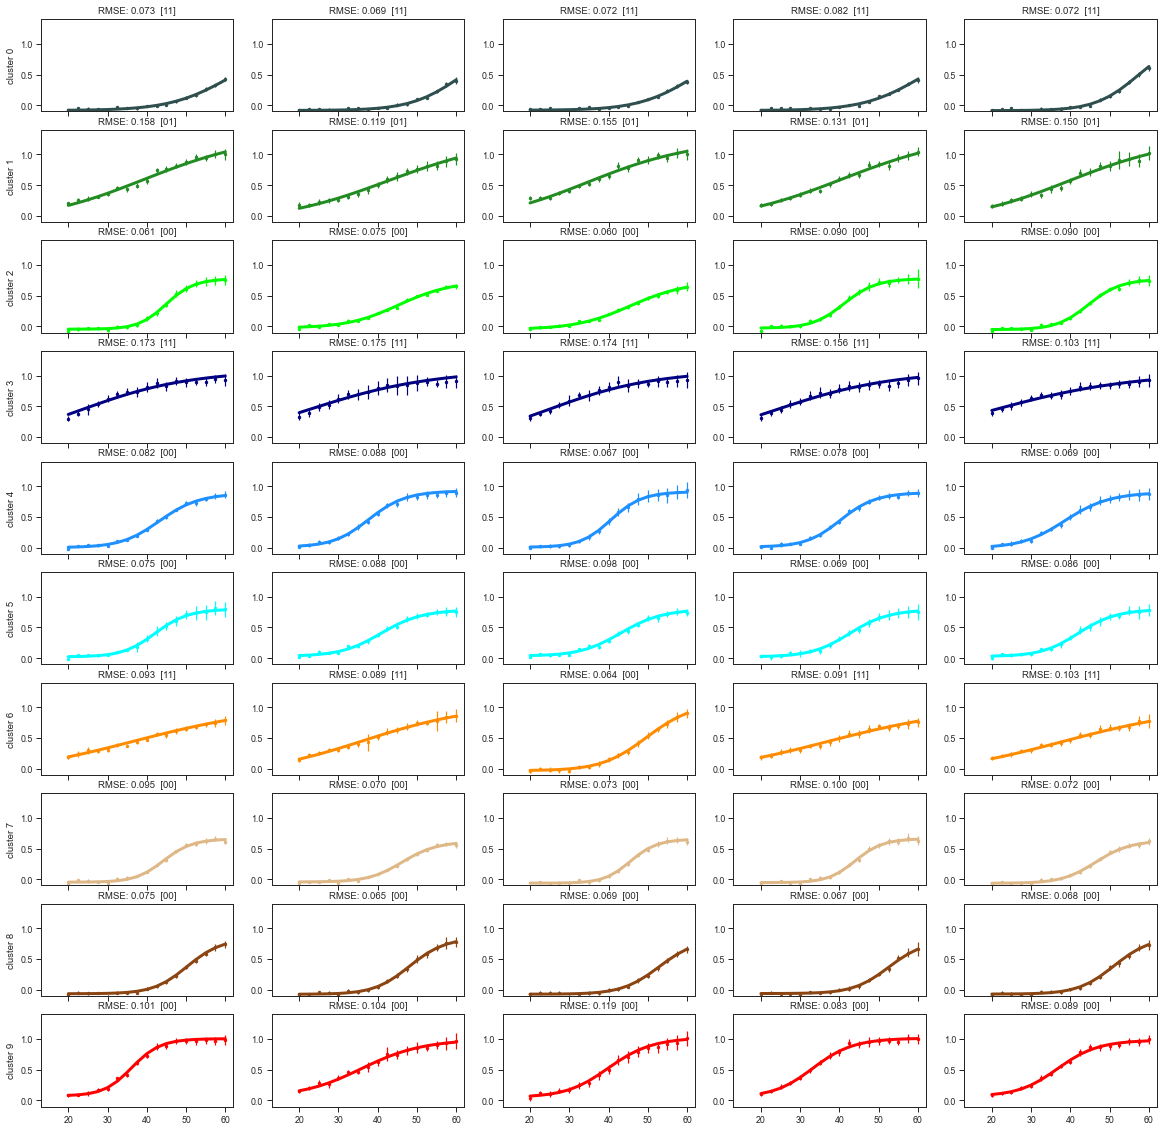

In [96]:
n_variant_plot = 5
variant_id = get_representative_variants(lib2)

fig, ax = plt.subplots(n_cluster, n_variant_plot, sharex=True, sharey=False , figsize=(20,20))
# fig.suptitle('Representative resuduals of each cluster')
for i in range(n_cluster):
    ax[i,0].set_ylabel('cluster %d' % i)
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.iloc[variant_id[i,j], :], ax[i,j], c=lbl_color_map['%02d'%i])

save_fig('./fig/representative_melting_curve_plots_v6.pdf')
# fig.show()

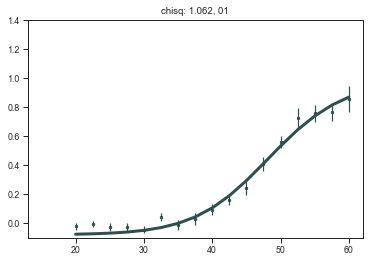

In [38]:
fig, ax = plt.subplots()
plot_actual_and_expected_fit(lib2.loc[18088, :], ax, c=lbl_color_map['00'])

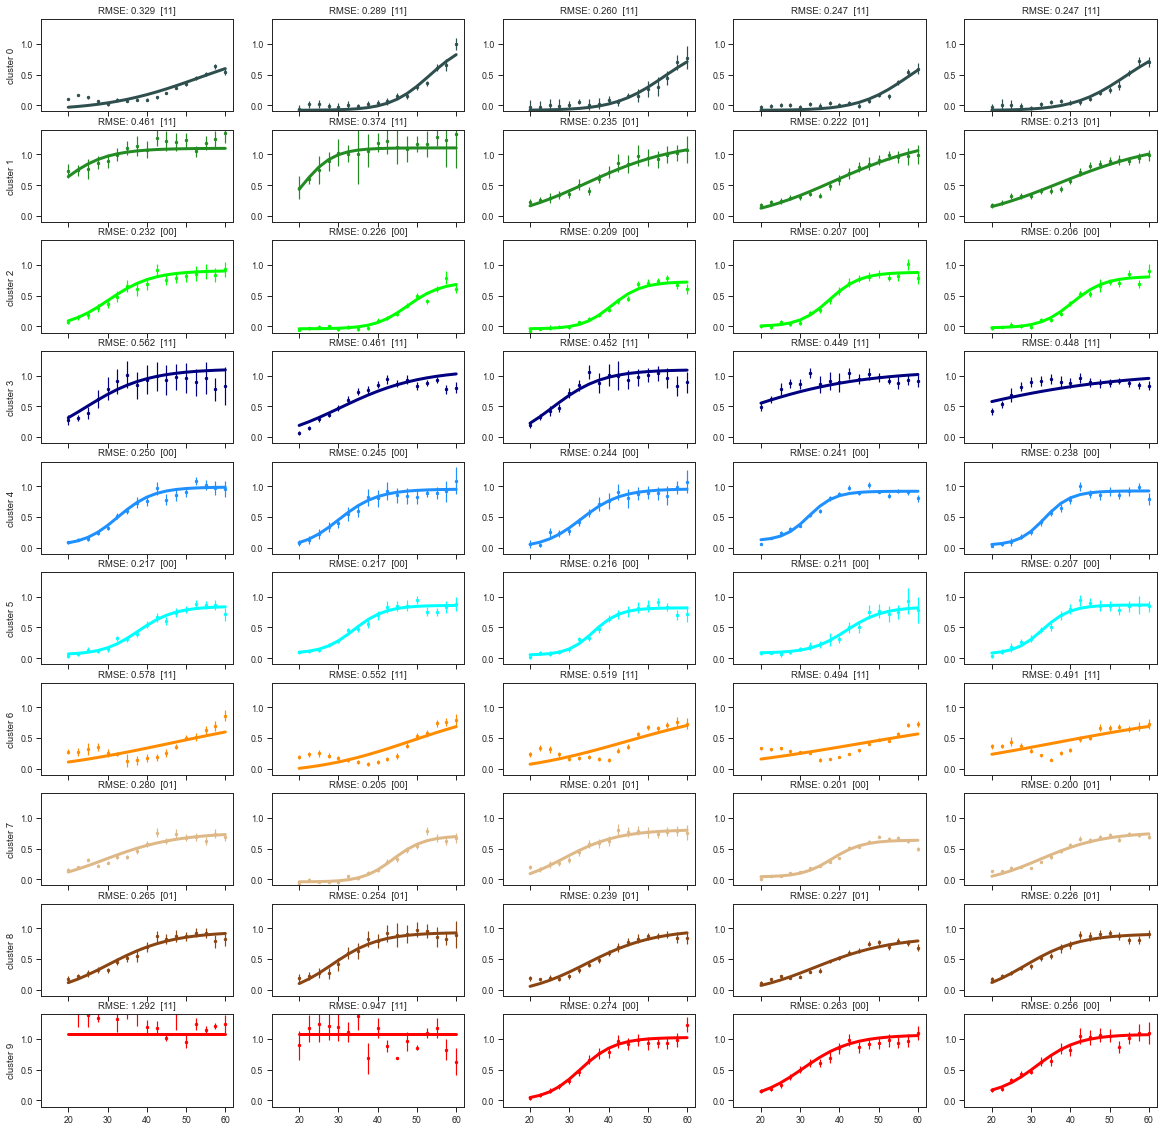

In [97]:
# WORST variants
n_variant_plot = 5
variant_id = get_worst_variants(lib2, n_variant_plot)

fig, ax = plt.subplots(n_cluster, n_variant_plot, sharex=True, sharey=False , figsize=(20,20))
# fig.suptitle('Representative resuduals of each cluster')
for i in range(n_cluster):
    ax[i,0].set_ylabel('cluster %d' % i)
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.loc[variant_id[i,j], :], ax[i,j], c=lbl_color_map['%02d'%i])

save_fig('./fig/worst_melting_curve_plots_v6.pdf')
# fig.show()

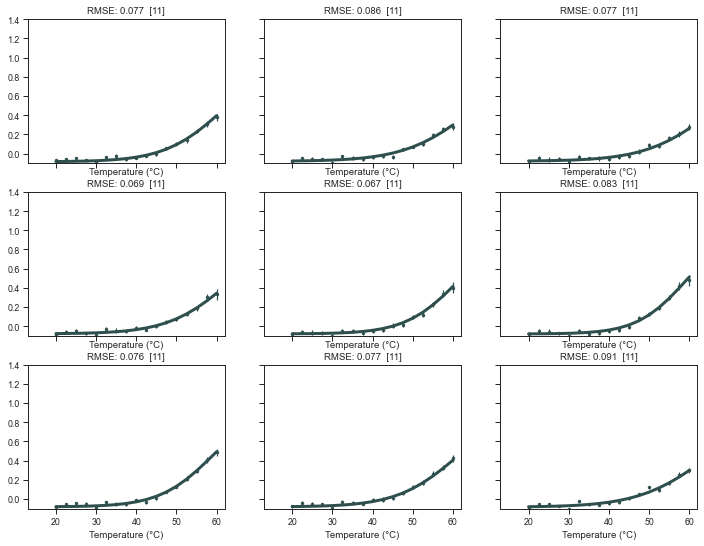

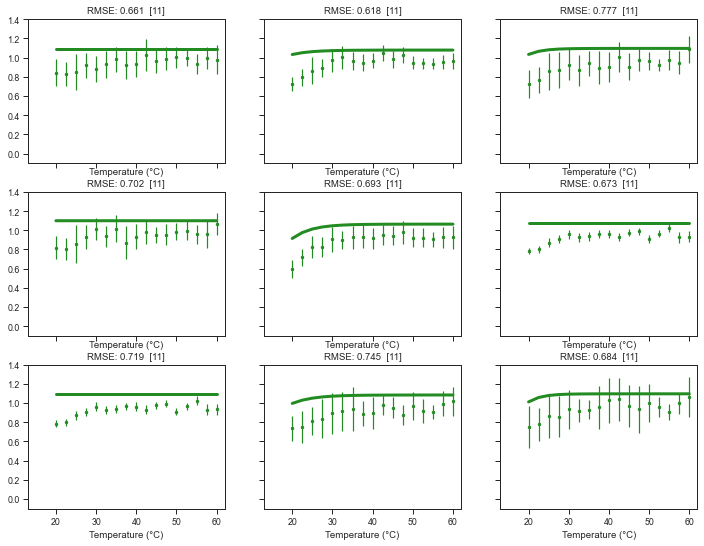

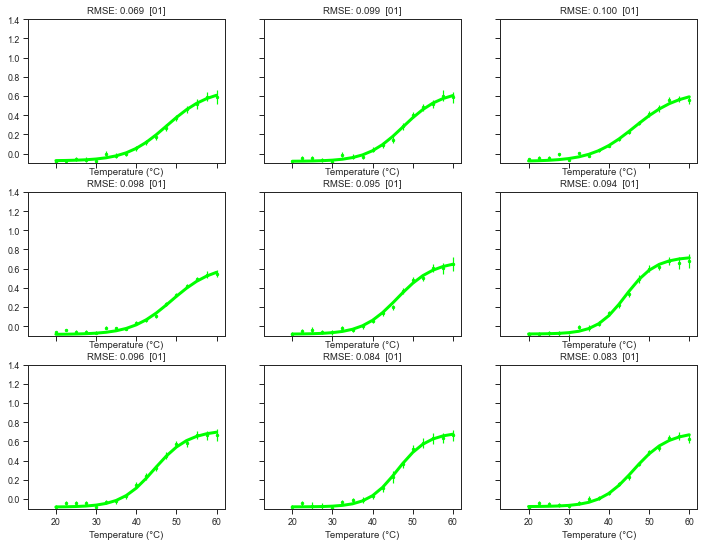

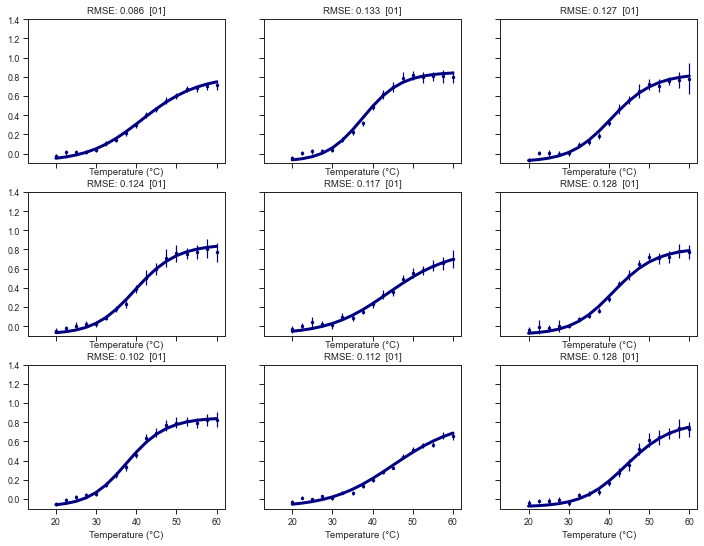

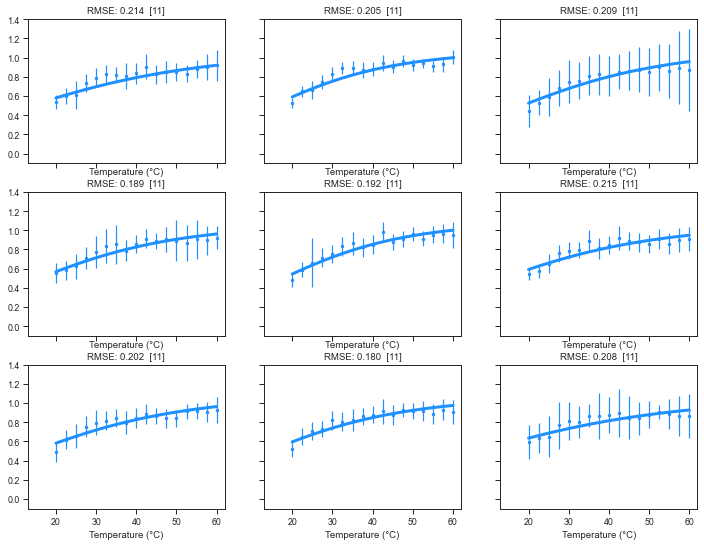

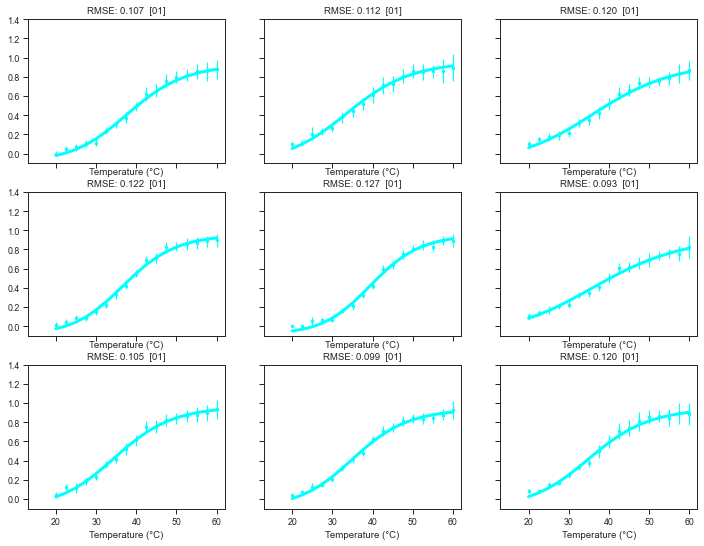

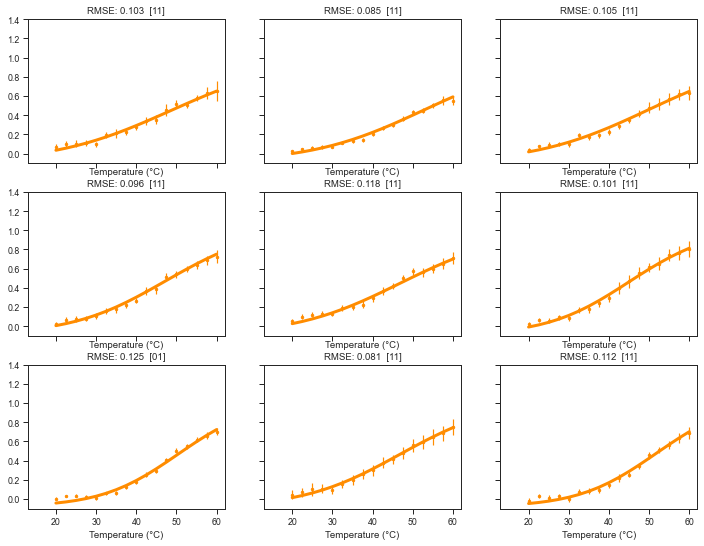

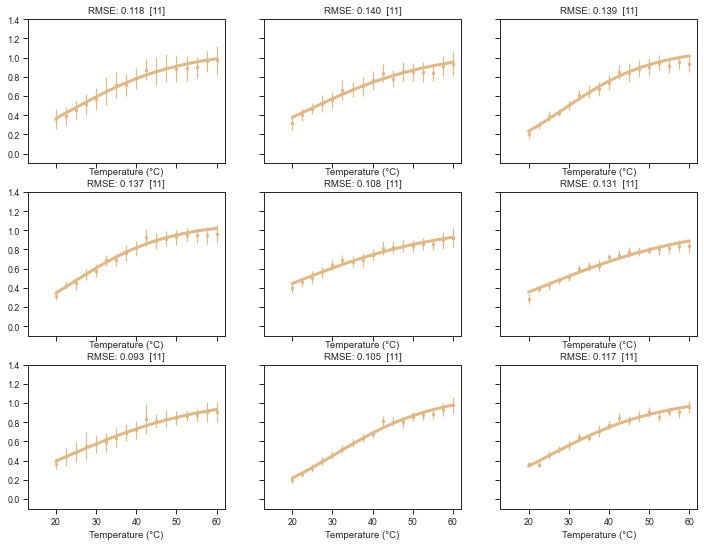

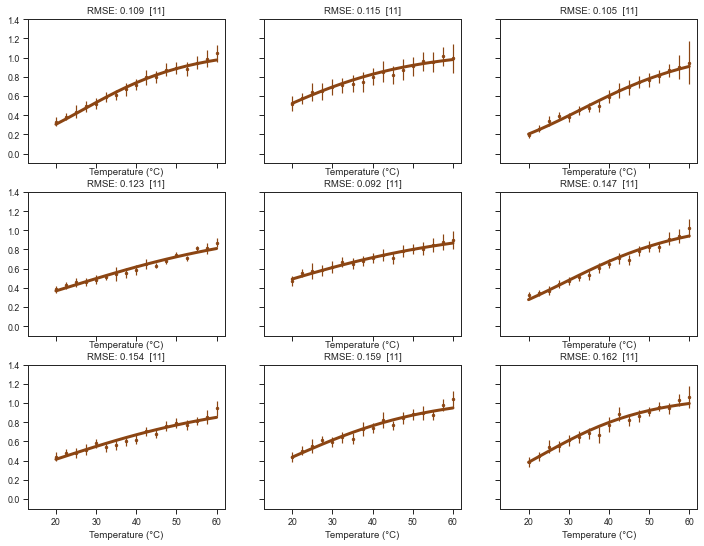

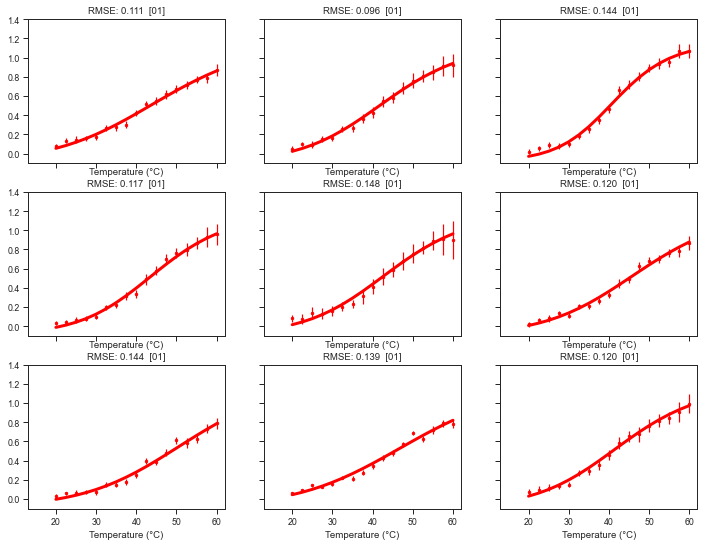

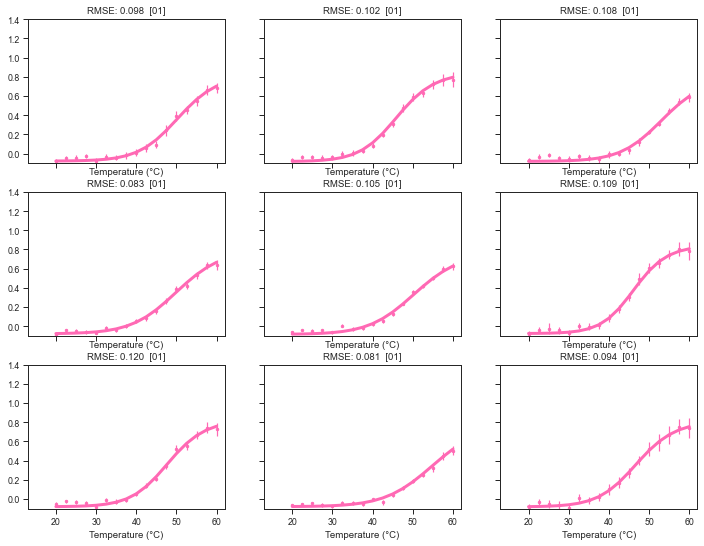

In [50]:
n_variant_plot = 9
variant_id = get_representative_variants(lib2.iloc[:,:])

for i in range(n_cluster):
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True , figsize=(12,9))
    ax = ax.flatten()
    plt.title('cluster %d' % i)
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.iloc[variant_id[i,j], :], ax[j], c=lbl_color_map['%02d'%i])
        ax[j].set_xlabel('Temperature (°C)')
        save_fig('./fig/representative_melting_curve_plots_cluster%02d_v5.pdf' % i)

# fig.show()

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_50328/4099832108.py:2: RuntimeWarning:

overflow encountered in exp

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_50328/4099832108.py:2: RuntimeWarning:

overflow encountered in exp

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_50328/4099832108.py:2: RuntimeWarning:

overflow encountered in exp



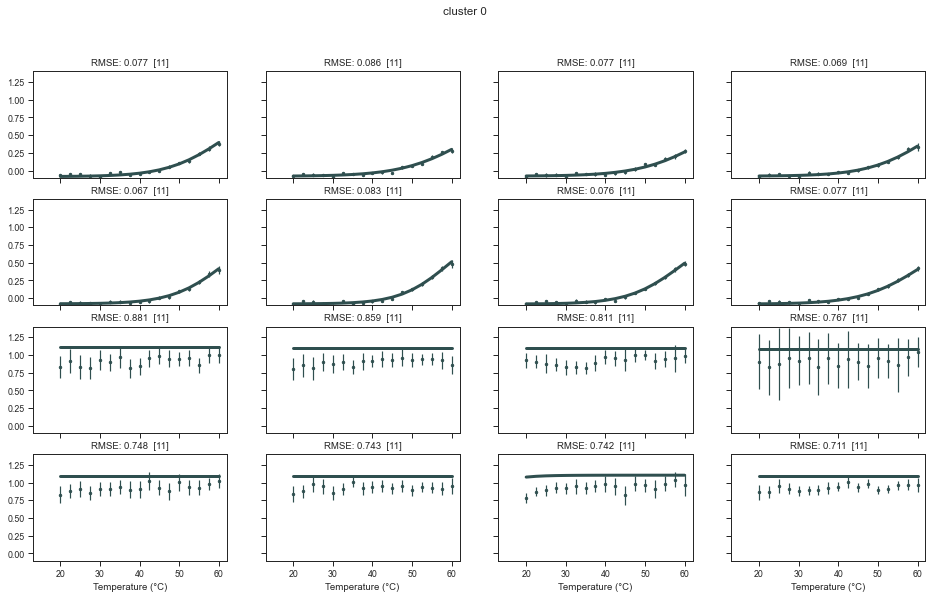

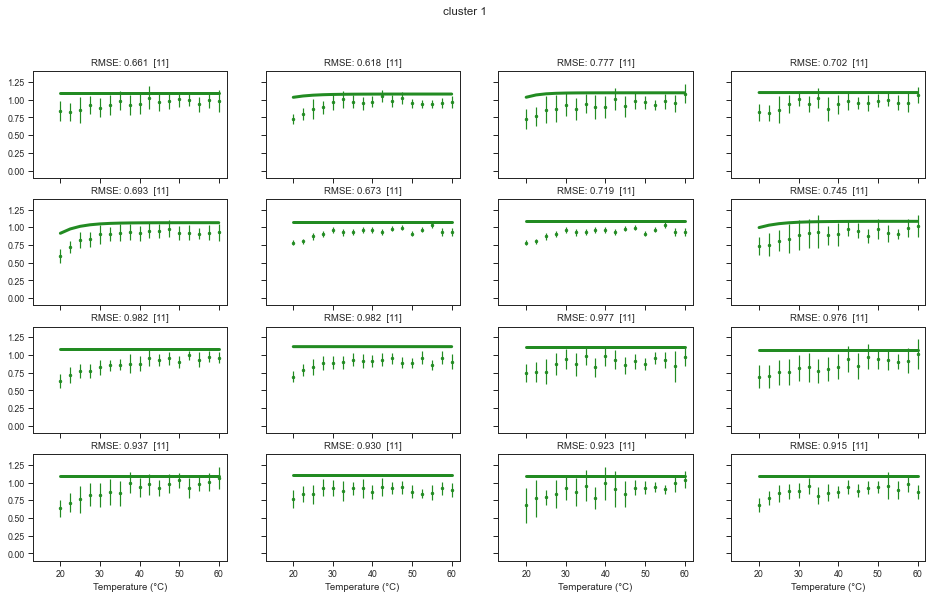

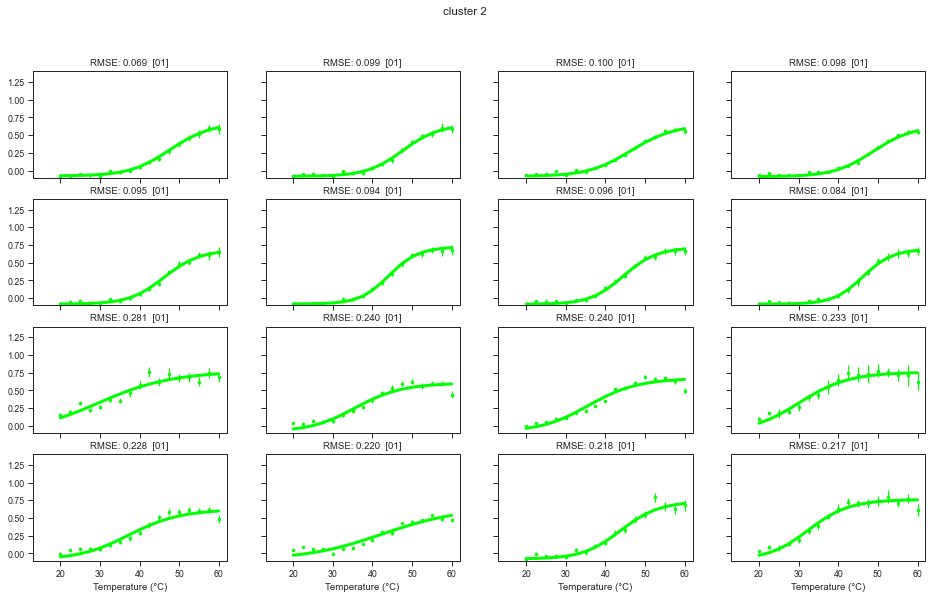

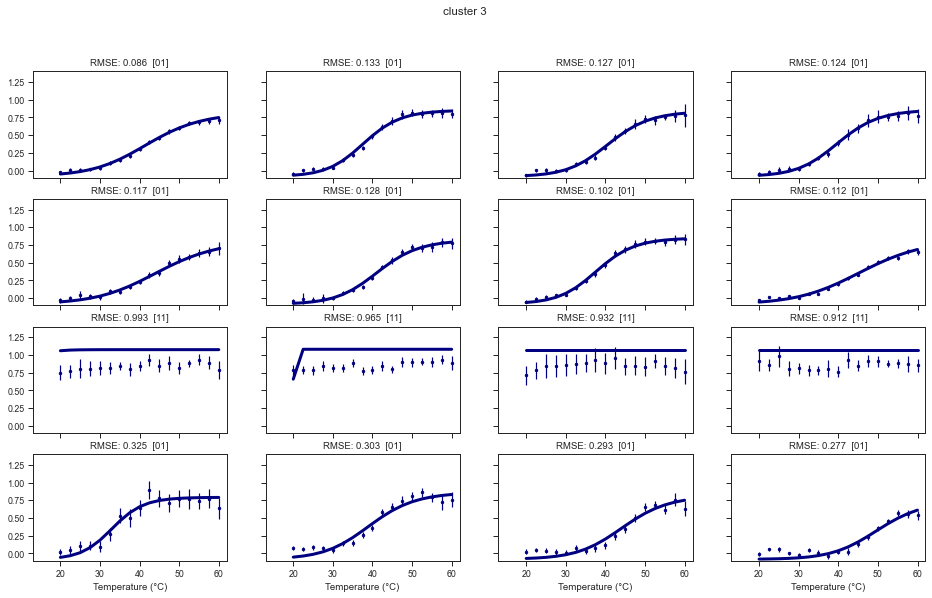

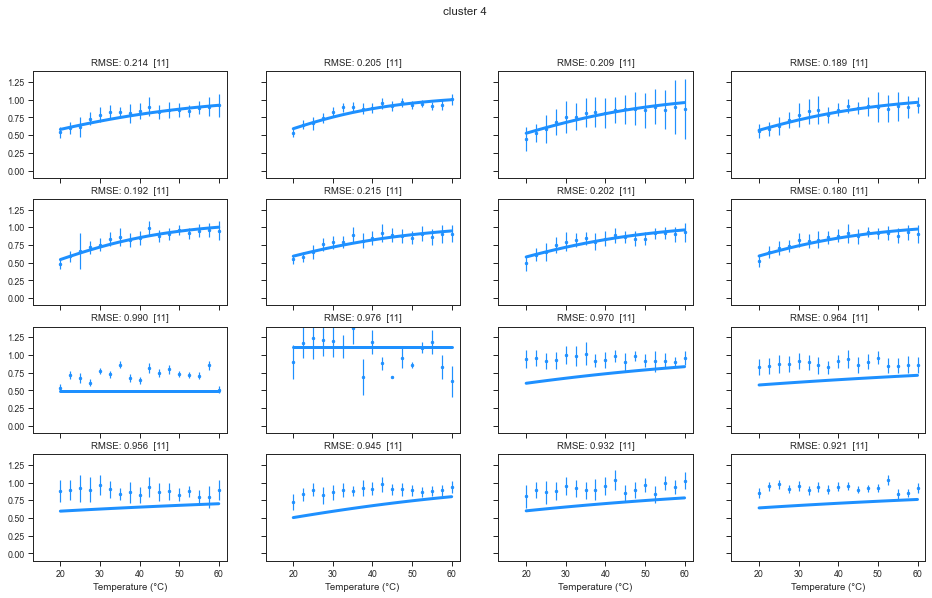

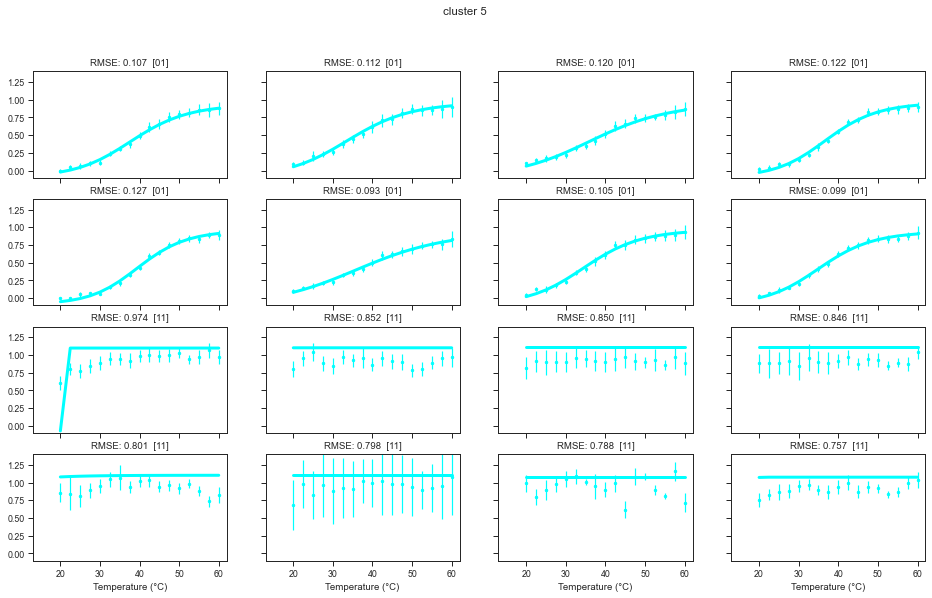

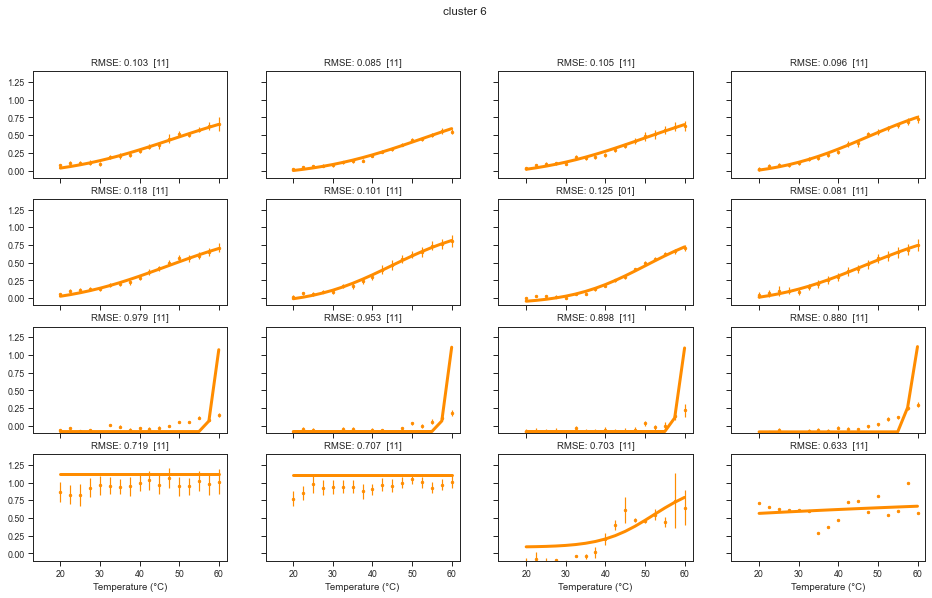

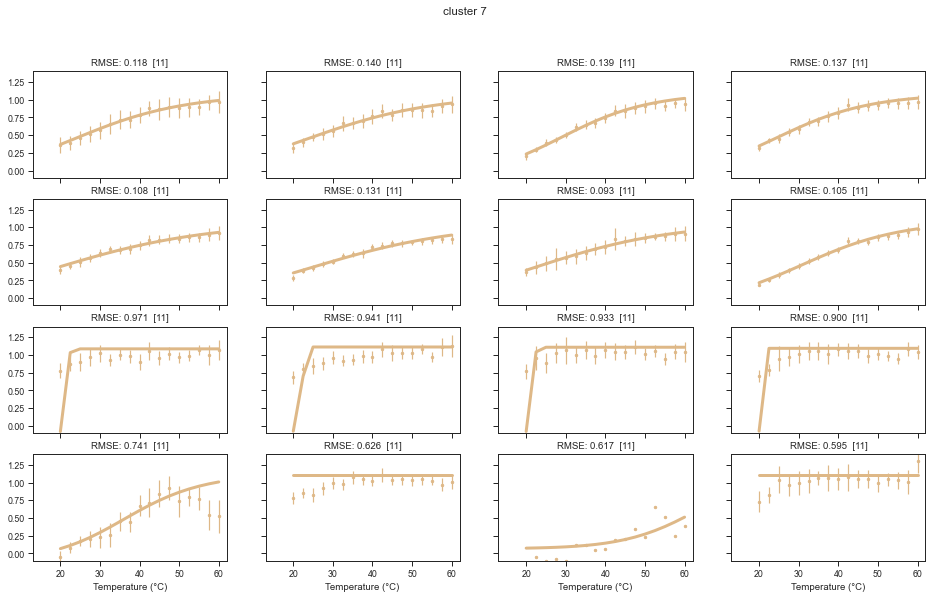

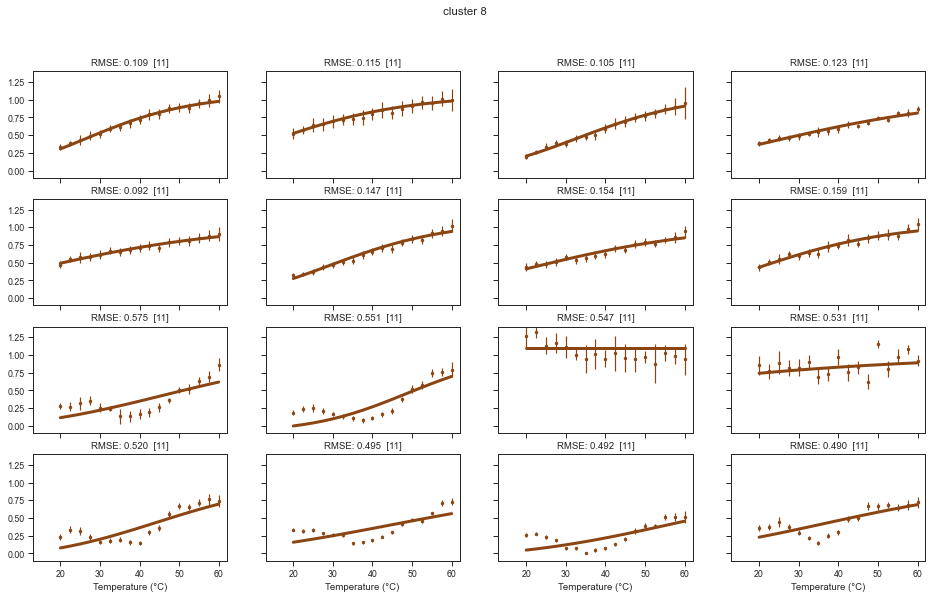

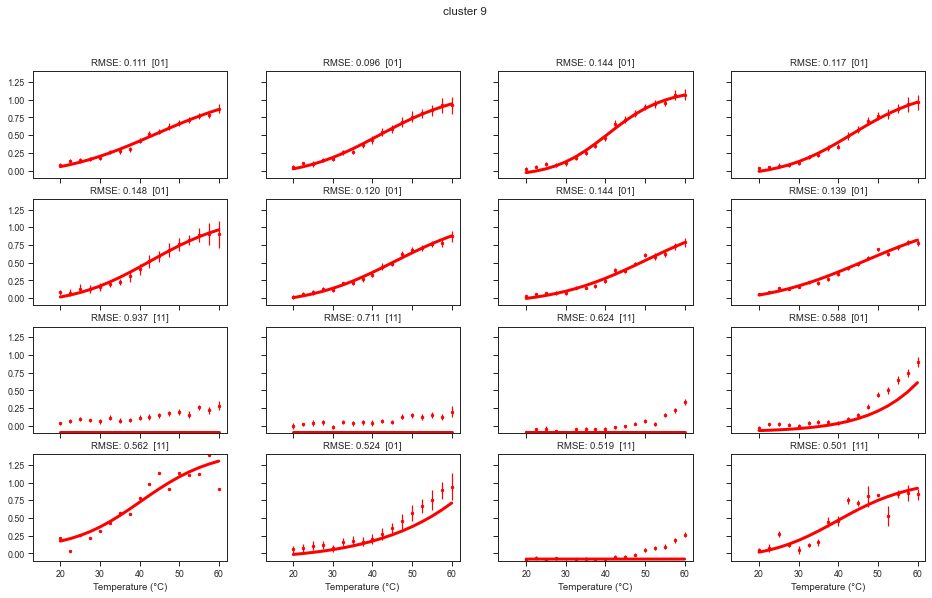

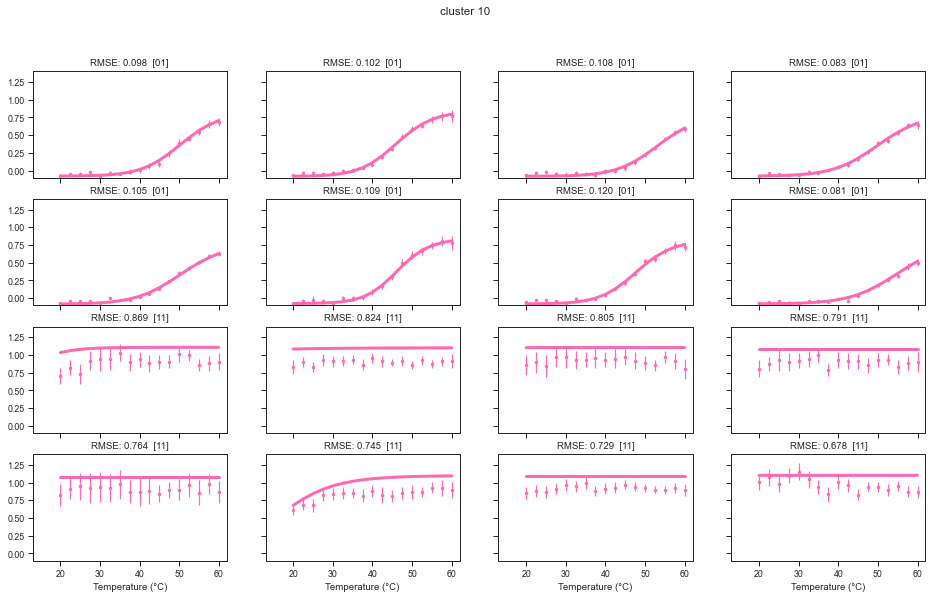

In [51]:
n_variant_plot = 8
representative_id = get_representative_variants(lib2, n_variant=n_variant_plot)
worst_id = get_worst_variants(lib2, n_variant=n_variant_plot)


for i in range(n_cluster):
    fig, ax = plt.subplots(4, 4, sharex=True, sharey=True , figsize=(16,9))
    ax = ax.flatten()
#     plt.title('cluster %d' % i)
    
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.iloc[representative_id[i,j], :], ax[j], c=lbl_color_map['%02d'%i])
        
        
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.loc[worst_id[i,j]], ax[j + n_variant_plot], c=lbl_color_map['%02d'%i])
        if j >= 4:
            ax[j + n_variant_plot].set_xlabel('Temperature (°C)')
        
    plt.suptitle('cluster %d' % i)
    save_fig('./fig/worst_and_representative_melting_curves_cluster%02d_v5.pdf' % i)

# fig.show()

/Users/yuxi/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



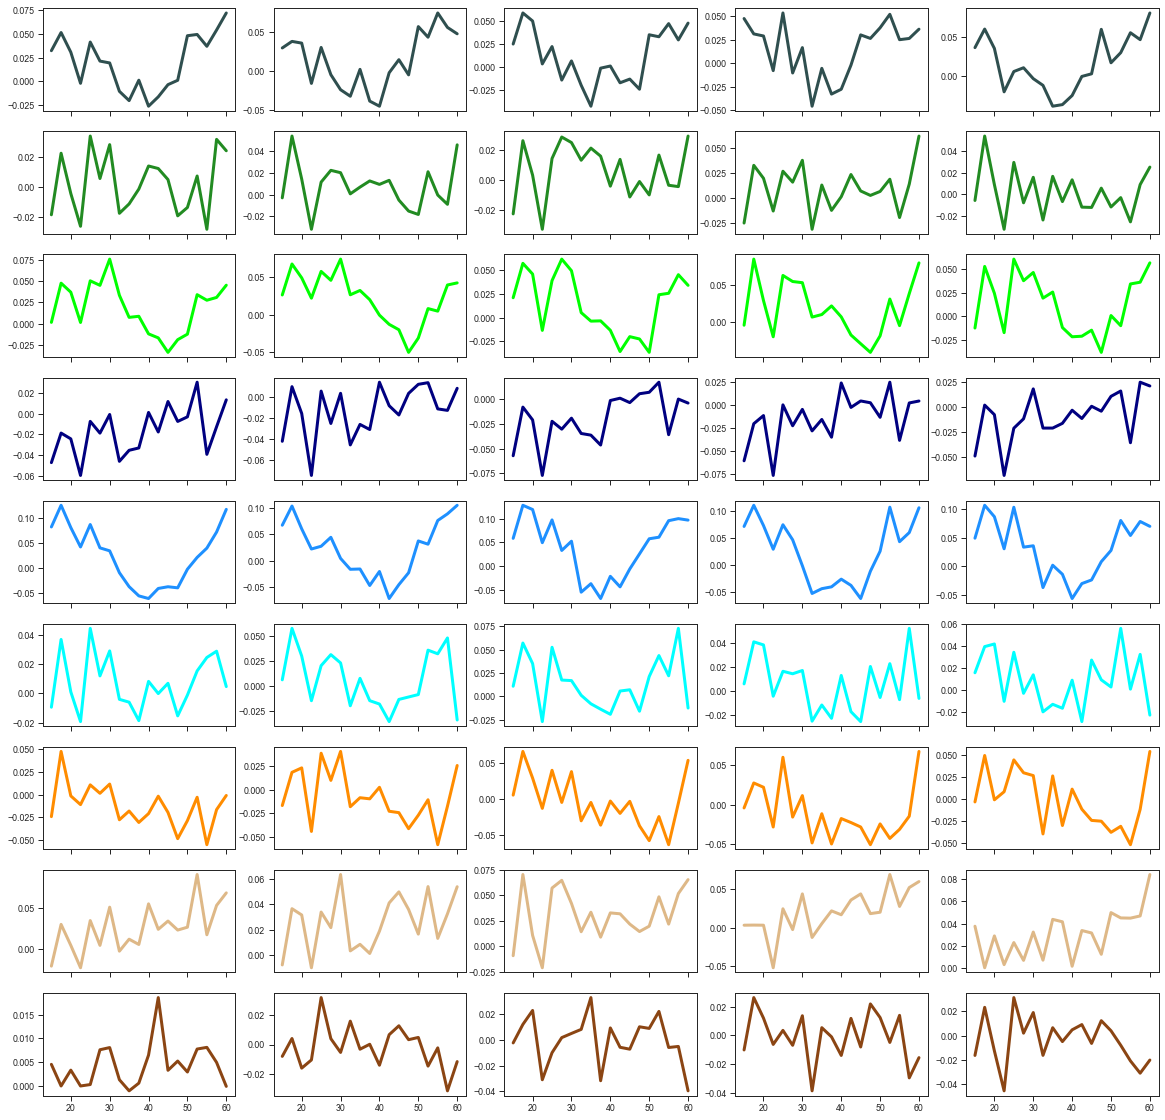

In [47]:
n_variant_plot = 5
variant_id = get_representative_variants(lib2.iloc[:,:])

fig, ax = plt.subplots(n_cluster, n_variant_plot, sharex=True, sharey=False , figsize=(20,20))
# fig.suptitle('Representative resuduals of each cluster')
for i in range(n_cluster):
    for j in range(n_variant_plot):
        ax[i,j].plot(T_celsius, lib2.iloc[variant_id[i,j]][residual_conds], color=lbl_color_map[str(i)], lw=3)
#         ax[i,j].set_ylim
fig.show()